In [1]:
%matplotlib notebook

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from __future__ import print_function
from __future__ import division

from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.axes3d as p3d
import matplotlib.pyplot as plt
from matplotlib import animation

import logo_maps as lm

In [4]:
#lm.print_bu_logo()

In [5]:
conferred_hash = lm.degree_hash(lm.CONFERRED, lm.INSTITUTION)
#lm.print_ascii_face_32(conferred_hash)

Galen S. Swint, BSCS, 2000-05-13
School of Engineering and Computer Science, Baylor University


In [6]:
def facemap_to_points(facemap):
    '''Return the points arrays dimension 1 and dimension 2 that correspond to 
    the face map. Assumes 32x32'''
    points = {'x':[],'y':[]}
    for charcount in range(len(facemap)):
        if facemap[charcount]=='1':
            points['x'].append(charcount % 32 )
            points['y'].append(32 - charcount // 32 )
    return points

def facemap_to_bitmap(facemap):
    '''Return a bitmap (numeric binary) of a given facemap. Assumes 32x32'''
    bitmap = []
    for i_hat in range(32):
        row = []
        for j_hat in range(32):
            row.append( 1 if facemap[i_hat * 32 + j_hat] == '1' else 0 )
        bitmap.append(row)
    return bitmap
    


In [7]:
conferred_degree_points = facemap_to_points(conferred_hash)
logo_map = lm.bu_logo()
logo_points = facemap_to_points(lm.bu_logo())
logo_bitmap = facemap_to_bitmap(logo_map)
conferred_bitmap = facemap_to_bitmap(conferred_hash)


In [8]:
from matplotlib.pyplot import figure, scatter

def scatter32x32(pointdict):
    plot_fig = figure()
    scatter(pointdict['x'], pointdict['y'])
    return plot_fig


<IPython.core.display.Javascript object>


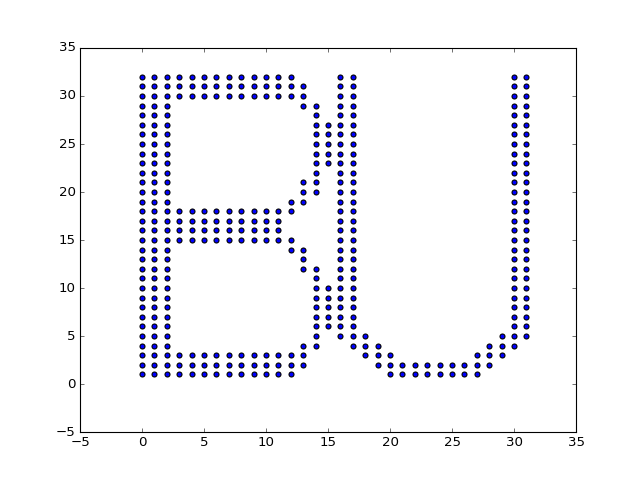

<IPython.core.display.Javascript object>


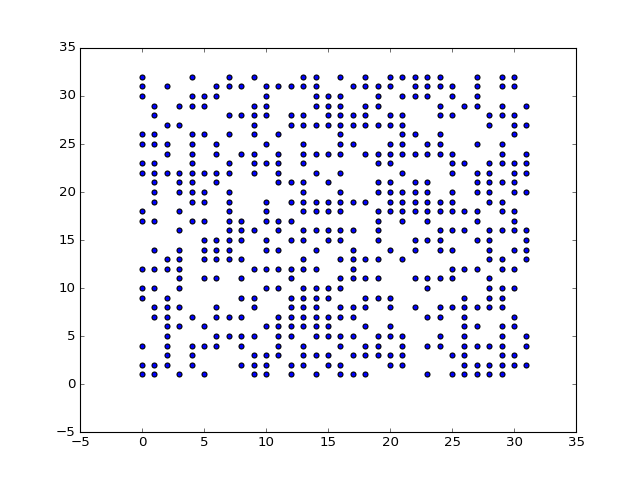

In [9]:
#%%
logo_fig = scatter32x32(logo_points)
#%%
degree_fig = scatter32x32(conferred_degree_points)


In [10]:
cubespace = []
xs = []
ys = []
zs = []

for z in range(32):
    for y in range(32):
        for x in range(32):
            # reverse the order of the y -axis as the bitmaps have y=0 in 
            # top left. Use y,x ordering because stores in rows
            xyz_val = (x, 32-y, z, 
                       conferred_bitmap[y][x] & logo_bitmap[y][z] )
            cubespace.append(xyz_val)
            if xyz_val[3] == 1:
                xs.append(xyz_val[0])
                ys.append(xyz_val[1])
                zs.append(xyz_val[2])

<IPython.core.display.Javascript object>


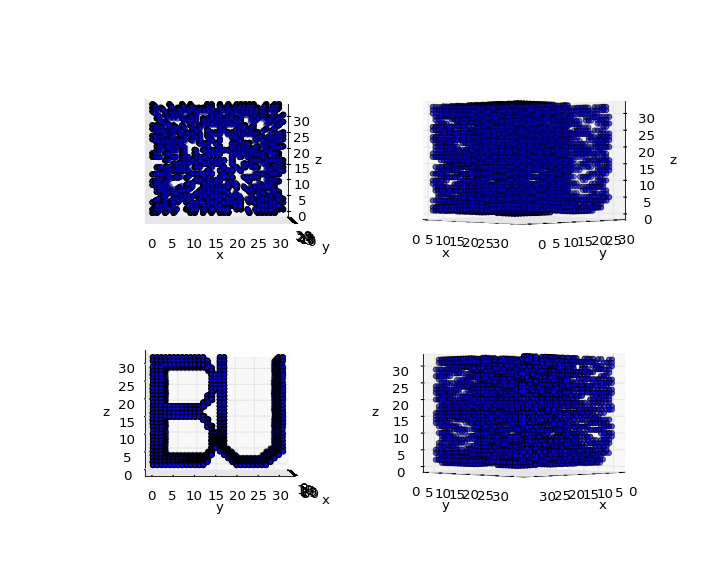

In [13]:
fig3d = plt.figure()
fig3d.set_figheight(16)
fig3d.set_figwidth(16)


for i in range(4):
    ax = fig3d.add_subplot(2, 2, i+1, projection='3d', 
                           azim=i*45 + -90, elev=0)
    ax.scatter(xs, ys, zs, zdir='y' )
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim3d(-1, 33)
    ax.set_ylim3d(-1, 33)
    ax.set_zlim3d(-1, 33)

fig3d.show()

<IPython.core.display.Javascript object>


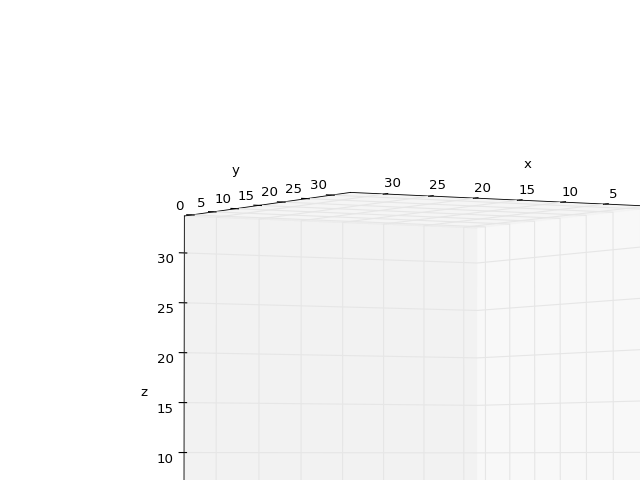

In [12]:
class AniDesk(object):
    def __init__(self, xs, ys, zs):
        fig_an = plt.figure()
        fig_an.set_figheight(10)
        fig_an.set_figwidth(10)

        aax = fig_an.add_subplot(111, projection='3d', 
                                   azim=i*45 + -90, elev=0)
        self.fig = fig_an
        self.aax = aax
        self.xs = xs
        self.ys = ys
        self.zs = zs
        self.angle = -90    
        
        self.ani = animation.FuncAnimation(self.fig, self.update, init_func=self.setup_plot, 
                                      interval=100)
    
    
    def setup_plot(self):
        print("init with xs: ", self.xs)
        self.aax.set_xlabel('x')
        self.aax.set_ylabel('y')
        self.aax.set_zlabel('z')
        
        self.scatplot = self.aax.scatter(self.xs, self.ys, self.zs, zdir='y', animated=True )
        
        self.aax.set_xlim3d(-1, 33)
        self.aax.set_ylim3d(-1, 33)
        self.aax.set_zlim3d(-1, 33)
        
        return self.scatplot


    
    def update(self, i):
        print(i)
        self.angle = self.angle + 15

        aax.view_init(0, self.angle)
        plt.draw()
        return aax

    def show(self):
        self.fig.show()

a = AniDesk(xs, ys, zs)
a.show()